In [1]:
%matplotlib widget

In [2]:
from crank_nicolson_2d import *

In [3]:
import numpy as np

In [4]:
def tunnelCase(position, where, width, potential = 1): 
    return np.where(
            (position.x > where) & (position.x < (where + width)), 
            potential, 
            0, 
        )

In [5]:
def hydrogenAtom(position, potential, bottom = 1): 
    return potential / np.sqrt(
            (position.x / 2) ** 2 \
            + (position.y / 2) ** 2 \
            + bottom ** 2 \
        )

In [6]:
def doubleSlit(position, where, width, slitHeight, gapHeight, potential = 1, math=np): 
    totalY = math.max(position.y)
    return math.where(
            (position.x > where) & (position.x < (where + width)) 
                    & ( \
                            (position.y > ((totalY / 2) + (gapHeight + slitHeight))) \
                            | (position.y < ((totalY / 2) - (gapHeight + slitHeight))) \
                            | ( \
                               (position.y > ((totalY / 2) - gapHeight)) \
                               & (position.y < ((totalY / 2) + gapHeight)) \
                              )
                      ), 
            potential, 
            0, 
        )

In [7]:
spatialStep : float = 1e-2
temporalStep : float = (spatialStep ** 2) / 4
courantNumber : float = 1.0
pointCount : int = int(1 / spatialStep)
barrierStart : float = .5
barrierWidth : float = .1
potentialHeight : float = 20000
print(pointCount)
assert (temporalStep / spatialStep) <= courantNumber
profile = SimulationProfile(
        makeLinspaceGrid(pointCount, 1, 2, False, float, np), 
        lambda position : makeWavePacket(position, .8, 0.5, spatialStep, .05, 15 * np.pi, np), 
        lambda position, time : tunnelCase(position, barrierStart, barrierWidth, potentialHeight), 
        temporalStep, 
        spatialStep, 
        False, 
        True
    )
simulator = Simulator(profile)
simulator.simulate(500, False)
probabilities, probabilityDecibles = simulator.processProbabilities()

100


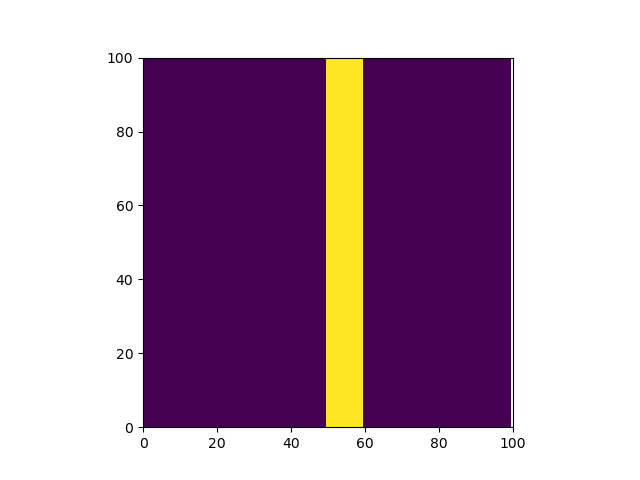

In [8]:
potentialAnimation = animateImages(pointCount, simulator.potentials)

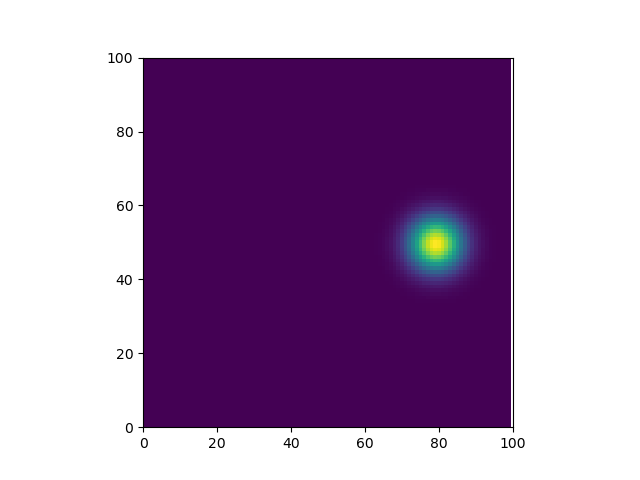

In [9]:
waveAnimation = animateImages(pointCount, simulator.probabilities, interval = 50)

In [10]:
postBarrierProbabilities, postBarrierCutFrames = totalProbabilityInRegion(
        probabilities, 
        pointCount, 
        spatialStep, 
        0, 
        0, 
        barrierStart, 
        1
    )

In [11]:
preBarrierProbabilities, preBarrierCutFrames = totalProbabilityInRegion(
        probabilities, 
        pointCount, 
        spatialStep, 
        barrierStart + barrierWidth, 
        0, 
        1 - (barrierStart + barrierWidth), 
        1
    )

In [12]:
intraBarrierProbabilities, intraBarrierCutFrames = totalProbabilityInRegion(
        probabilities, 
        pointCount, 
        spatialStep, 
        barrierStart, 
        0, 
        barrierWidth, 
        1
    )

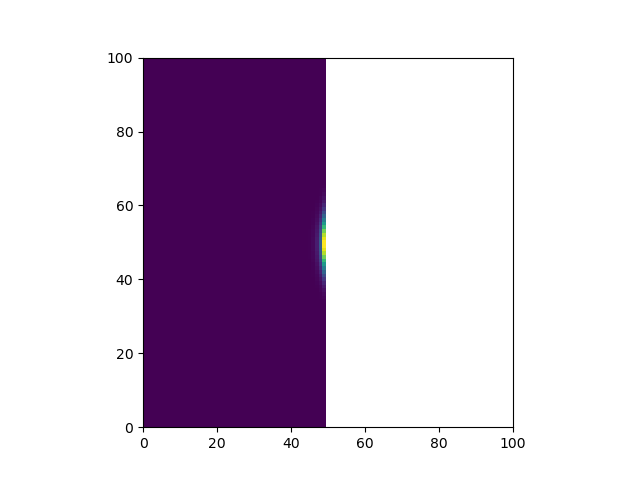

In [13]:
cutAnimationPostBarrier = animateImages(pointCount, postBarrierCutFrames, interval = 50)

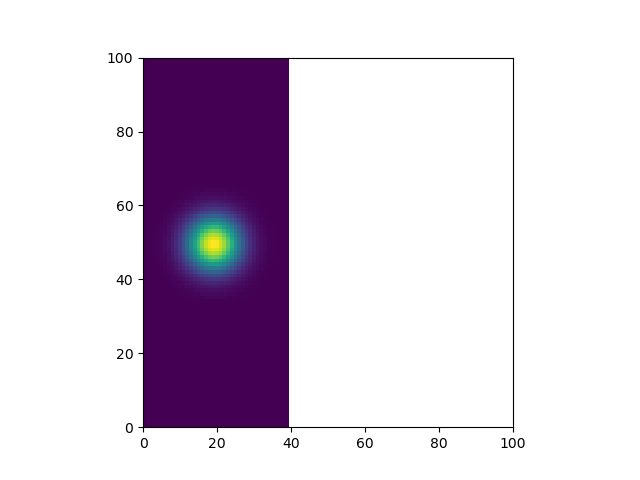

In [14]:
cutAnimationPreBarrier = animateImages(pointCount, preBarrierCutFrames, interval = 50)

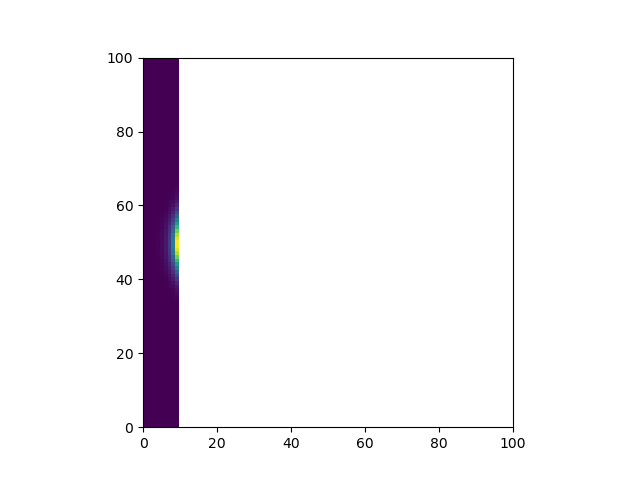

In [15]:
cutAnimationIntraBarrier = animateImages(pointCount, intraBarrierCutFrames, interval = 50)

Text(0.5, 1.0, 'Quantum Tunneling: Total Probability in Different Regions')

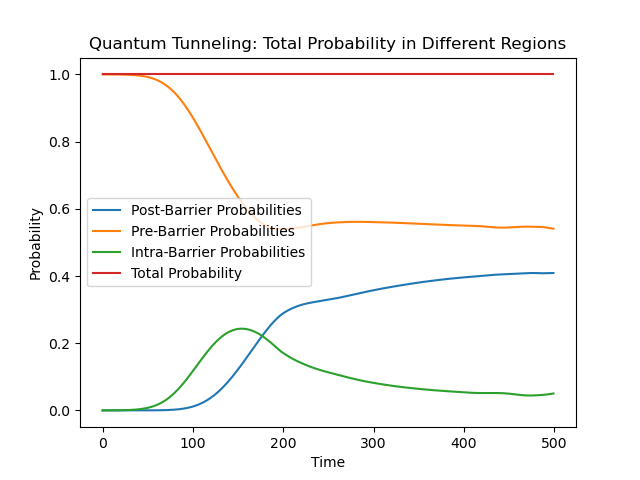

In [16]:
plt.figure()
time = np.arange(len(postBarrierProbabilities) * temporalStep)
plt.plot(postBarrierProbabilities)
plt.plot(preBarrierProbabilities)
plt.plot(intraBarrierProbabilities)
plt.plot(postBarrierProbabilities + intraBarrierProbabilities + preBarrierProbabilities)
plt.legend([
        "Post-Barrier Probabilities", 
        "Pre-Barrier Probabilities", 
        "Intra-Barrier Probabilities", 
        "Total Probability"
    ])
plt.xlabel("Time")
plt.ylabel("Probability")
plt.title("Quantum Tunneling: Total Probability in Different Regions")

In [17]:
#waveAnimation.save("med_res_tunneling_0_unscaled.mp4")